# Support Vector Machines (SVM)

**Goal**: SVM is a supervised learning algorithm that finds the optimal decision boundary (hyperplane) to separate classes with the **maximum margin**.

**Use Cases**:
- High-dimensional classification (e.g., text, images)
- Finance: fraud detection, default risk
- Bioinformatics: cancer classification, protein function

**Steps of SVM (linear)**:
1. Map input features into space
2. Find the hyperplane separating classes with max margin
3. Use support vectors to define boundary
4. Classify new points by their side of the hyperplane

**Key Concepts**:
- Margin and support vectors
- Hard vs soft margin
- Hinge loss
- Kernel trick (nonlinear SVM)
- Dual formulation (Lagrange multipliers)


## Introduction to SVM

SVM aims to find the **hyperplane** that best separates two classes while maximizing the **margin** between them.

### Linear SVM:
For binary classification $y_i \in \{-1, +1\}$:

Find $w, b$ such that the decision function is:
$$
f(x) = \text{sign}(w^\top x + b)
$$

### Optimization Objective:

#### Hard Margin SVM (no overlap):
$$
\min_{w, b} \frac{1}{2} \| w \|^2 \quad \text{subject to} \quad y_i(w^\top x_i + b) \geq 1
$$

#### Soft Margin SVM:
Allows some violations via slack variables $\xi_i$:
$$
\min_{w, b, \xi} \frac{1}{2} \| w \|^2 + C \sum_{i=1}^n \xi_i \quad \text{s.t.} \quad y_i(w^\top x_i + b) \geq 1 - \xi_i, \; \xi_i \geq 0
$$

- **$C$** controls trade-off between margin size and training error

---

### Geometric Interpretation:
- Margin: distance between closest points of each class
- Support vectors: points lying exactly on the margin boundaries
- Decision boundary: $w^\top x + b = 0$

---

### Hinge Loss (used in soft margin SVM):
$$
L_{\text{hinge}}(y_i, f(x_i)) = \max(0, 1 - y_i f(x_i))
$$

---

### Kernel SVM:
For nonlinear separation, map $x$ to a high-dimensional space $\phi(x)$ using a kernel function:
$$
K(x_i, x_j) = \phi(x_i)^\top \phi(x_j)
$$

Common kernels:
- Linear: $K(x_i, x_j) = x_i^\top x_j$
- Polynomial: $K(x_i, x_j) = (x_i^\top x_j + c)^d$
- RBF (Gaussian): $K(x_i, x_j) = \exp(-\gamma \| x_i - x_j \|^2)$

SVM does not require explicitly computing $\phi(x)$ — the kernel trick avoids it.


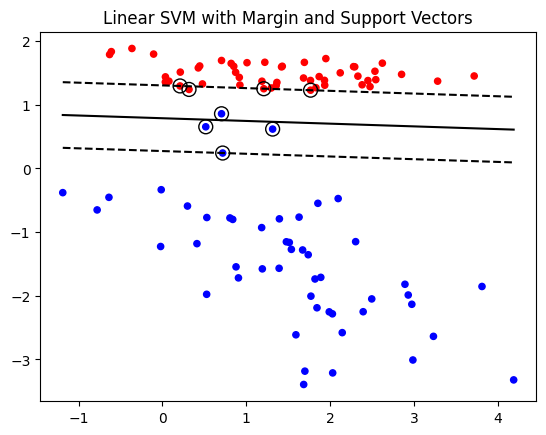

In [1]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic 2D data
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1, class_sep=1.5, random_state=0)
y = 2 * y - 1  # Convert to -1, 1

# Train linear SVM
svm = SVC(kernel='linear', C=1.0)
svm.fit(X, y)

# Plot decision boundary
w = svm.coef_[0]
b = svm.intercept_[0]
x0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x1 = -(w[0] * x0 + b) / w[1]

margin = 1 / np.linalg.norm(w)
x1_margin_up = x1 + margin
x1_margin_down = x1 - margin

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=20)
plt.plot(x0, x1, 'k-')
plt.plot(x0, x1_margin_up, 'k--')
plt.plot(x0, x1_margin_down, 'k--')
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k')
plt.title("Linear SVM with Margin and Support Vectors")
plt.show()


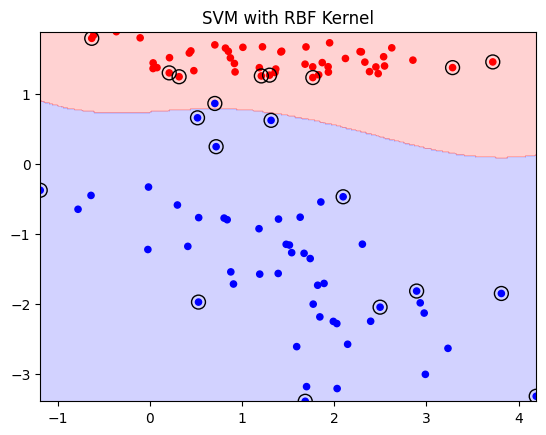

In [2]:
# Train nonlinear SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', gamma=0.5, C=1.0)
svm_rbf.fit(X, y)

# Mesh grid for plotting
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 300),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 300))
Z = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot decision regions
plt.contourf(xx, yy, Z, cmap='bwr', alpha=0.2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=20)
plt.scatter(svm_rbf.support_vectors_[:, 0], svm_rbf.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k')
plt.title("SVM with RBF Kernel")
plt.show()


## Hinge Loss vs Logistic Loss

### Hinge Loss (SVM):
Used in soft-margin SVM, it penalizes margin violations:
$$
L_{\text{hinge}}(y, f(x)) = \max(0, 1 - y \cdot f(x))
$$

- Linear penalty once within the margin or misclassified
- Zero loss if correctly classified **with margin**
- Encourages a **large margin**

### Logistic Loss (Logistic Regression):
Used for probabilistic modeling:
$$
L_{\text{log}}(y, f(x)) = \log(1 + \exp(-y \cdot f(x)))
$$

- Smooth, differentiable everywhere
- Penalizes **all misclassifications** (even if confidently wrong)
- Output interpreted as probability via sigmoid:
  $$ P(y=1|x) = \frac{1}{1 + \exp(-f(x))} $$

---

### Key Differences

|                | Hinge Loss (SVM)       | Logistic Loss (LogReg)      |
|----------------|------------------------|------------------------------|
| Type           | Margin-based           | Probabilistic                |
| Output         | Class only (+1 / -1)   | Probability                  |
| Loss curve     | Piecewise linear       | Smooth exponential           |
| Margin         | Explicit (max margin)  | Implicit                     |
| Optimization   | Quadratic program      | Convex, but not quadratic    |
| Use cases      | High-margin separation | Probabilistic modeling       |

---

### Visual Comparison:

- Logistic loss never flatlines
- Hinge loss flattens for $y \cdot f(x) \geq 1$


## Support Vector Regression (SVR)

SVM can be adapted for regression by using a different loss function — the **$\varepsilon$-insensitive loss**.

### Objective:
SVR tries to find a function $f(x) = w^\top x + b$ that deviates from the target $y_i$ by at most $\varepsilon$ for all points, while keeping the model flat (i.e., small $w$).

---

### SVR Optimization:
$$
\min_{w, b, \xi, \xi^*} \frac{1}{2} \|w\|^2 + C \sum_{i=1}^n (\xi_i + \xi_i^*)
$$

subject to:
$$
\begin{aligned}
y_i - w^\top x_i - b &\leq \varepsilon + \xi_i \\
w^\top x_i + b - y_i &\leq \varepsilon + \xi_i^* \\
\xi_i, \xi_i^* &\geq 0
\end{aligned}
$$

- $\varepsilon$ defines the **tube** around the model where no penalty is given
- $\xi_i$, $\xi_i^*$ are **slack variables** for errors outside the tube

---

### Why SVR?
- Robust to small fluctuations in $y$
- Controlled flexibility via $\varepsilon$ and $C$
- Kernel trick can be used for **nonlinear regression**


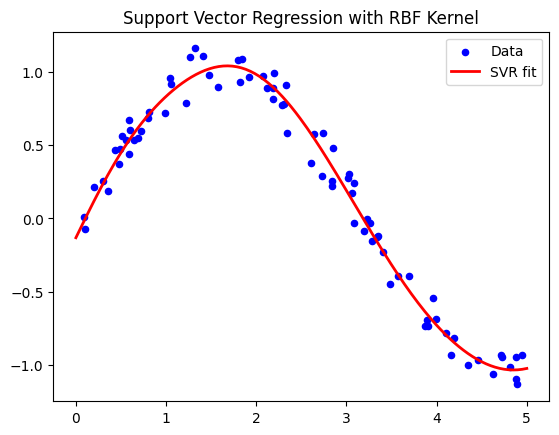

In [3]:
# SVR with RBF kernel
from sklearn.svm import SVR

# Generate data
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, 80)

# Fit SVR
svr = SVR(kernel='rbf', C=100, epsilon=0.1, gamma=0.5)
svr.fit(X, y)

# Plot
X_plot = np.linspace(0, 5, 200).reshape(-1, 1)
y_pred = svr.predict(X_plot)

plt.scatter(X, y, color='blue', s=20, label='Data')
plt.plot(X_plot, y_pred, color='red', lw=2, label='SVR fit')
plt.title("Support Vector Regression with RBF Kernel")
plt.legend()
plt.show()


## SVM in High-Dimensional Applications

SVM is often **most effective** in high-dimensional sparse data settings like:

### 1. Text Classification (e.g., spam detection, sentiment analysis)

- Features: TF-IDF or word embeddings
- Dimensions: 10,000+
- SVM with linear kernel often outperforms deep models on small datasets

```python
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

# Load data
data = fetch_20newsgroups(subset='train', categories=['sci.space', 'rec.sport.baseball'])
X_text, y_text = data.data, data.target

# SVM pipeline for text classification
model = make_pipeline(TfidfVectorizer(), SVC(kernel='linear', C=1.0))
model.fit(X_text, y_text)

print("Train Accuracy:", model.score(X_text, y_text))


## 2. SVM in Finance: Feature-Rich Tabular Data

SVM is highly effective for structured financial data when you have many features, such as:

- Historical asset returns
- Technical indicators (e.g., moving averages, volatility)
- Macroeconomic variables
- Company fundamentals

These problems often involve:
- High dimensionality
- Moderate sample size
- Noisy, overlapping class distributions

---

### Use Cases

- **Market Regime Classification**: Predict bull vs. bear markets
- **Credit Risk Modeling**: Classify likelihood of default
- **Trade Signal Classification**: Predict whether to enter a trade

---

### Tips for Using SVM in Finance

- **Scale features** using `StandardScaler` before applying SVM
- Prefer **linear kernels** unless there is strong evidence of nonlinearity
- Use **cross-validation** to tune:
  - `C` (regularization)
  - `kernel` (linear, RBF, poly)
  - `gamma` (for RBF)

---

### Example Pipeline

Use `Pipeline` and `GridSearchCV` for scalable evaluation:

```python
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

pipeline = make_pipeline(
    StandardScaler(),
    SVC(kernel='linear')
)

param_grid = {
    'svc__C': [0.1, 1, 10]
}

search = GridSearchCV(pipeline, param_grid, cv=5)
search.fit(X_train, y_train)
